# Homework week 5

In [6]:
import numpy as np; import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
np.random.seed(1)

In [7]:
def generate_data(sample_size):
    """Generate training data.
    Since
    f(x) = w^{T}x + b
    can be written as
    f(x) = (w^{T}, b)(x^{T}, 1)^{T},
    for the sake of simpler implementation of SVM,
    we return (x^{T}, 1)^{T} instead of x
    :param sample_size: number of data points in the sample
    :return: a tuple of data point and label
    """
    x = np.random.normal(size=(sample_size, 3))
    x[:, 2] = 1.
    x[:sample_size // 2, 0] -= 5.
    x[sample_size // 2:, 0] += 5.
    y = np.concatenate([np.ones(sample_size // 2, dtype=np.int64),-np.ones(sample_size // 2, dtype=np.int64)])
    x[:3, 1] -= 5.
    y[:3] = -1
    x[-3:, 1] += 5.
    y[-3:] = 1
    return x, y

In [8]:
def svm(x, y, l, lr):
    """Linear SVM implementation using gradient descent algorithm.
    f_w(x) = w^{T} (x^{T}, 1)^{T}
    :param x: data points
    :param y: label
    :param l: regularization parameter
    :param lr: learning rate
    :return: three-dimensional vector w
    """
    w = np.zeros(3)
    prev_w = w.copy()
    R = x.T.dot(x)
    for i in range(10 ** 4): 
        # implement here
        # compute margin
        m = 1 - w.T.dot(x.T)*y
        # compute the sub gradient of hinge loss
        yx = - y[:,None]*x
        ms = np.sum(np.where(m > 0, 1, 0)[:,None]*yx, axis=0)
        # gradient descent
        w = w - lr*(ms + l*R.dot(w))
        if np.linalg.norm(w - prev_w) < 1e-3:
            break
        prev_w = w.copy()
    return w

In [9]:
def visualize(x, y, w):
    plt.clf()
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.scatter(x[y == 1, 0], x[y == 1, 1])
    plt.scatter(x[y == -1, 0], x[y == -1, 1])
    plt.plot([-10, 10], -(w[2] + np.array([-10, 10]) * w[0]) / w[1])
    plt.savefig('lecture6-h2.png')
    plt.show()

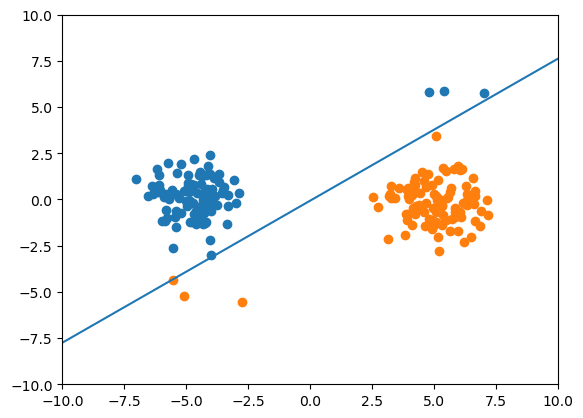

In [12]:
x, y = generate_data(200)
w = svm(x, y, l=.01, lr=0.001)
visualize(x, y, w)